In [1]:
from fastai.vision.all import *
import gradio as gr
from PIL import Image

/home/husen/anaconda3/envs/mlgpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


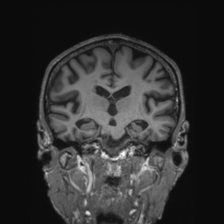

In [2]:
im=PILImage.create('verymild.jpeg')
im.thumbnail((224,224))
im

In [5]:
def get_label(x):
    return x.parent.name

learn=load_learner('model.pkl')

In [7]:
categories=learn.dls.vocab

def classify_image(im):
    learn.model.eval()  # Force evaluation mode
    if not isinstance(im, Image.Image):
        im = Image.fromarray(im)
    with learn.no_bar():
        pred, idx, probs = learn.predict(im)
    return dict(zip(learn.dls.vocab, map(float, probs)))

In [8]:
classify_image(im)

{'MildDemented': 0.0007512291776947677,
 'ModerateDemented': 2.577845066298323e-07,
 'NonDemented': 2.8415809083526256e-06,
 'VeryMildDemented': 0.9992456436157227}

In [11]:
image=gr.Image(type="pil")
label=gr.Label()
examples=[['tileshop.jpg'],['verymild.jpeg'],['moderate.png'],['md.PNG']]

In [12]:
intf=gr.Interface(fn=classify_image,inputs=image,outputs=label,examples=examples)
intf.launch(inline=False)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
